Enter path to .txt file (or press Enter for default):  


Graph successfully loaded from edge list.

--- Facebook Graph Analysis Menu ---
1. Show number of nodes and edges
2. Display part of adjacency matrix
3. Visualize graph
4. Detect and count cycles
5. Check connectivity
6. Check path between two nodes
7. Count triangles and quadrilateral cycles
8. Visualize BFS and DFS trees
9. Export graph to GraphML for Gephi
10. Load and sample nodes from facebook_combined.txt
0. Exit


Enter your choice:  8
Enter root node for traversal:  56


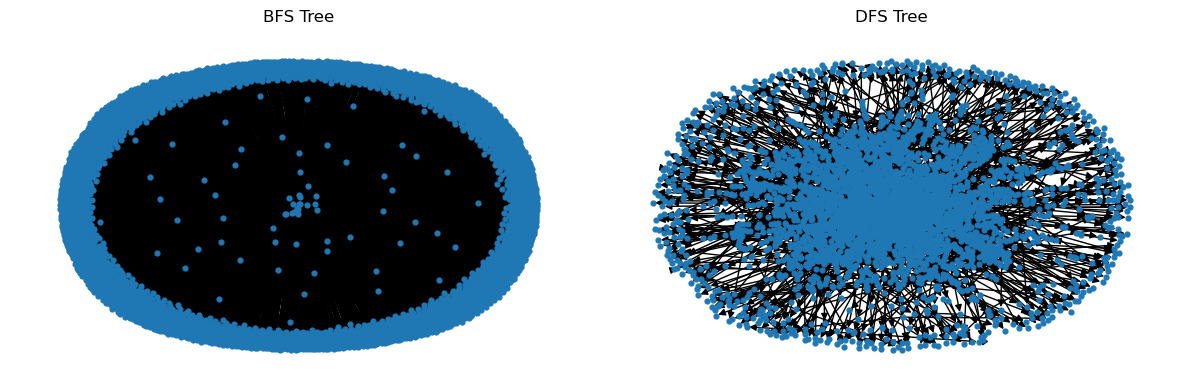


--- Facebook Graph Analysis Menu ---
1. Show number of nodes and edges
2. Display part of adjacency matrix
3. Visualize graph
4. Detect and count cycles
5. Check connectivity
6. Check path between two nodes
7. Count triangles and quadrilateral cycles
8. Visualize BFS and DFS trees
9. Export graph to GraphML for Gephi
10. Load and sample nodes from facebook_combined.txt
0. Exit


Enter your choice:  0


Exiting.


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import deque
import os

# Load graph from edge list (.txt)
def load_full_graph(file_path):
    try:
        G = nx.read_edgelist(file_path)
        print("Graph successfully loaded from edge list.")
        return G
    except Exception as e:
        print(f"Error loading graph: {e}")
        return None

# Adjacency matrix
def get_adjacency_matrix(G):
    return nx.to_numpy_array(G, dtype=int)

# Visualize full graph
def visualize_graph(G):
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, node_size=10, with_labels=False)
    plt.title("Visualization of Facebook Combined Graph")
    plt.show()

# Detect cycles
def count_cycles(G):
    print("Detecting cycles (this may take time)...")
    cycles = list(nx.cycle_basis(G))
    print(f"Number of simple cycles: {len(cycles)}")
    if cycles:
        lengths = [len(c) for c in cycles]
        print(f"Cycle length stats: min={min(lengths)}, max={max(lengths)}, avg={np.mean(lengths):.2f}")

# Triangles and quadrilaterals
def count_triangles_and_quads(G):
    triangle_count = sum(nx.triangles(G).values()) // 3
    print(f"Total triangles: {triangle_count}")
    cycles = list(nx.cycle_basis(G))
    quad_cycles = [c for c in cycles if len(c) == 4]
    print(f"Quadrilateral (4-node) cycles: {len(quad_cycles)}")

# Connectivity check
def check_connectivity(G):
    if nx.is_connected(G):
        print("The graph is connected.")
    else:
        print(f"The graph is NOT connected. Components: {nx.number_connected_components(G)}")

# Check path
def check_path_between_nodes(G):
    try:
        node1 = input("Enter first node ID: ").strip()
        node2 = input("Enter second node ID: ").strip()
        if node1 in G and node2 in G:
            if nx.has_path(G, node1, node2):
                print(f"A path exists between {node1} and {node2}.")
            else:
                print(f"No path exists between {node1} and {node2}.")
        else:
            print("One or both nodes not found.")
    except Exception as e:
        print(f"Error: {e}")

# BFS and DFS
def visualize_bfs_dfs(G):
    root = input("Enter root node for traversal: ").strip()
    if root not in G:
        print("Node not found.")
        return

    bfs_tree = nx.bfs_tree(G, root)
    dfs_tree = nx.dfs_tree(G, root)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    nx.draw(bfs_tree, node_size=12, with_labels=False)
    plt.title("BFS Tree")

    plt.subplot(1, 2, 2)
    nx.draw(dfs_tree, node_size=12, with_labels=False)
    plt.title("DFS Tree")

    plt.tight_layout()
    plt.show()

# Export to Gephi
def export_to_gephi(G, output_path):
    try:
        nx.write_graphml(G, output_path)
        print(f"Exported to: {output_path}")
    except Exception as e:
        print(f"Export failed: {e}")

# Load and sample nodes from the facebook_combined.txt file
def list_sample_nodes(file_path, sample_size=100):
    try:
        G = nx.read_edgelist(file_path)
        nodes = list(G.nodes)
        print(f"Sample {sample_size} nodes from the graph:")
        print(nodes[:sample_size])
    except Exception as e:
        print(f"Error loading or processing the file: {e}")

# Main
def main():
    default_graph_path = r"C:\Users\adebo\OneDrive\Desktop\BSU\522\facebook_combined.txt"
    user_input = input(f"Enter path to .txt file (or press Enter for default): ").strip()
    graph_path = user_input if user_input else default_graph_path

    if not os.path.exists(graph_path):
        print("File not found.")
        return

    G = load_full_graph(graph_path)
    if not G:
        return

    adj_matrix = get_adjacency_matrix(G)

    while True:
        print("\n--- Facebook Graph Analysis Menu ---")
        print("1. Show number of nodes and edges")
        print("2. Display part of adjacency matrix")
        print("3. Visualize graph")
        print("4. Detect and count cycles")
        print("5. Check connectivity")
        print("6. Check path between two nodes")
        print("7. Count triangles and quadrilateral cycles")
        print("8. Visualize BFS and DFS trees")
        print("9. Export graph to GraphML for Gephi")
        print("10. Load and sample nodes from facebook_combined.txt")
        print("0. Exit")
        choice = input("Enter your choice: ").strip()

        if choice == '1':
            print(f"Nodes: {G.number_of_nodes()}, Edges: {G.number_of_edges()}")
        elif choice == '2':
            print("Adjacency matrix (top-left 10x10):")
            print(adj_matrix[:10, :10])
        elif choice == '3':
            visualize_graph(G)
        elif choice == '4':
            count_cycles(G)
        elif choice == '5':
            check_connectivity(G)
        elif choice == '6':
            check_path_between_nodes(G)
        elif choice == '7':
            count_triangles_and_quads(G)
        elif choice == '8':
            visualize_bfs_dfs(G)
        elif choice == '9':
            out_path = input("Enter output GraphML path: ").strip()
            if out_path:
                export_to_gephi(G, out_path)
            else:
                print("Invalid path.")
        elif choice == '10':
            list_sample_nodes(graph_path)
        elif choice == '0':
            print("Exiting.")
            break
        else:
            print("Invalid choice. Try again.")

if __name__ == "__main__":
    main()


Enter path to .graphml file (or press Enter for default):  


Graph successfully loaded.

--- Facebook Graph Analysis Menu ---
1. Show number of nodes and edges
2. Display part of adjacency matrix
3. Visualize graph
4. Detect and count cycles
5. Check connectivity
6. Check path between two nodes
7. Count triangles and quadrilateral cycles
8. Visualize BFS and DFS trees
9. Export graph to GraphML for Gephi
10. Load and sample nodes from one .edges file
0. Exit


Enter your choice:  8
Enter root node for traversal:  827


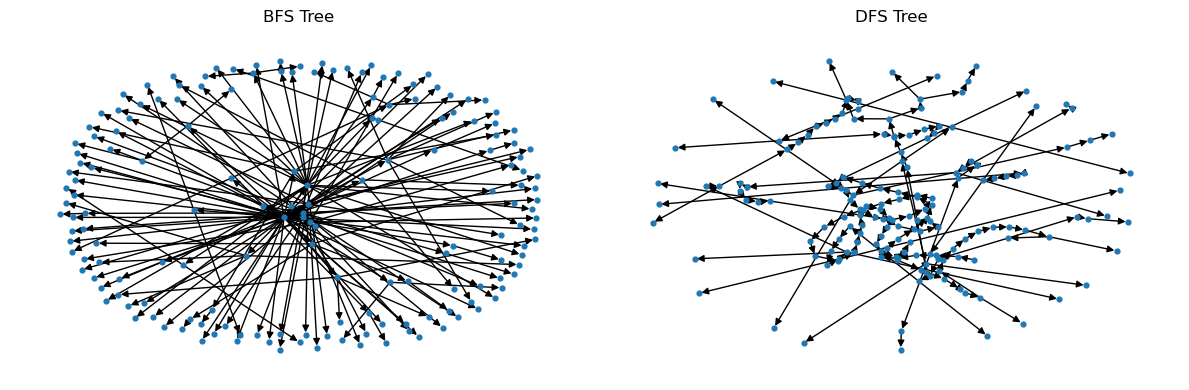


--- Facebook Graph Analysis Menu ---
1. Show number of nodes and edges
2. Display part of adjacency matrix
3. Visualize graph
4. Detect and count cycles
5. Check connectivity
6. Check path between two nodes
7. Count triangles and quadrilateral cycles
8. Visualize BFS and DFS trees
9. Export graph to GraphML for Gephi
10. Load and sample nodes from one .edges file
0. Exit


Enter your choice:  0


Exiting.


In [3]:
# Load .graphml graph
def load_full_graph(file_path):
    try:
        G = nx.read_graphml(file_path)
        print("Graph successfully loaded.")
        return nx.Graph(G)
    except Exception as e:
        print(f"Error loading graph: {e}")
        return None

# Adjacency matrix
def get_adjacency_matrix(G):
    return nx.to_numpy_array(G, dtype=int)

# Visualize full graph
def visualize_graph(G):
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, node_size=10, with_labels=False)
    plt.title("Visualization of Facebook Combined Graph")
    plt.show()

# Detect cycles
def count_cycles(G):
    print("Detecting cycles (this may take time)...")
    cycles = list(nx.cycle_basis(G))
    print(f"Number of simple cycles: {len(cycles)}")
    if cycles:
        lengths = [len(c) for c in cycles]
        print(f"Cycle length stats: min={min(lengths)}, max={max(lengths)}, avg={np.mean(lengths):.2f}")

# Triangles and quadrilaterals
def count_triangles_and_quads(G):
    triangle_count = sum(nx.triangles(G).values()) // 3
    print(f"Total triangles: {triangle_count}")
    cycles = list(nx.cycle_basis(G))
    quad_cycles = [c for c in cycles if len(c) == 4]
    print(f"Quadrilateral (4-node) cycles: {len(quad_cycles)}")

# Connectivity check
def check_connectivity(G):
    if nx.is_connected(G):
        print("The graph is connected.")
    else:
        print(f"The graph is NOT connected. Components: {nx.number_connected_components(G)}")

# Check path
def check_path_between_nodes(G):
    try:
        node1 = input("Enter first node ID: ").strip()
        node2 = input("Enter second node ID: ").strip()
        if node1 in G and node2 in G:
            if nx.has_path(G, node1, node2):
                print(f"A path exists between {node1} and {node2}.")
            else:
                print(f"No path exists between {node1} and {node2}.")
        else:
            print("One or both nodes not found.")
    except Exception as e:
        print(f"Error: {e}")

# BFS and DFS
def visualize_bfs_dfs(G):
    root = input("Enter root node for traversal: ").strip()
    if root not in G:
        print("Node not found.")
        return

    bfs_tree = nx.bfs_tree(G, root)
    dfs_tree = nx.dfs_tree(G, root)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    nx.draw(bfs_tree, node_size=12, with_labels=False)
    plt.title("BFS Tree")

    plt.subplot(1, 2, 2)
    nx.draw(dfs_tree, node_size=12, with_labels=False)
    plt.title("DFS Tree")

    plt.tight_layout()
    plt.show()

# Export to Gephi
def export_to_gephi(G, output_path):
    try:
        nx.write_graphml(G, output_path)
        print(f"Exported to: {output_path}")
    except Exception as e:
        print(f"Export failed: {e}")

# List and sample from one selected .edges file
def list_sample_nodes_from_file():
    directory_path = r'C:\Users\adebo\OneDrive\Desktop\BSU\522\facebook'
    edges_files = [f for f in os.listdir(directory_path) if f.endswith(".edges")]

    if not edges_files:
        print("No .edges files found.")
        return

    print("\nAvailable .edges files:")
    for i, fname in enumerate(edges_files, 1):
        print(f"{i}. {fname}")

    try:
        choice = int(input("Choose a file number to load: ").strip())
        if 1 <= choice <= len(edges_files):
            filepath = os.path.join(directory_path, edges_files[choice - 1])
            G = nx.read_edgelist(filepath)
            nodes = list(G.nodes)
            print(f"Sample nodes from {edges_files[choice - 1]}:")
            print(nodes[:30])
        else:
            print("Invalid selection.")
    except Exception as e:
        print(f"Error: {e}")

# Main
def main():
    default_graphml = r"C:\Users\adebo\OneDrive\Desktop\BSU\522\facebook_graphml\686.graphml"
    user_input = input(f"Enter path to .graphml file (or press Enter for default): ").strip()
    graph_path = user_input if user_input else default_graphml

    if not os.path.exists(graph_path):
        print("File not found.")
        return

    G = load_full_graph(graph_path)
    if not G:
        return

    adj_matrix = get_adjacency_matrix(G)

    while True:
        print("\n--- Facebook Graph Analysis Menu ---")
        print("1. Show number of nodes and edges")
        print("2. Display part of adjacency matrix")
        print("3. Visualize graph")
        print("4. Detect and count cycles")
        print("5. Check connectivity")
        print("6. Check path between two nodes")
        print("7. Count triangles and quadrilateral cycles")
        print("8. Visualize BFS and DFS trees")
        print("9. Export graph to GraphML for Gephi")
        print("10. Load and sample nodes from one .edges file")
        print("0. Exit")
        choice = input("Enter your choice: ").strip()

        if choice == '1':
            print(f"Nodes: {G.number_of_nodes()}, Edges: {G.number_of_edges()}")
        elif choice == '2':
            print("Adjacency matrix (top-left 10x10):")
            print(adj_matrix[:10, :10])
        elif choice == '3':
            visualize_graph(G)
        elif choice == '4':
            count_cycles(G)
        elif choice == '5':
            check_connectivity(G)
        elif choice == '6':
            check_path_between_nodes(G)
        elif choice == '7':
            count_triangles_and_quads(G)
        elif choice == '8':
            visualize_bfs_dfs(G)
        elif choice == '9':
            out_path = input("Enter output GraphML path: ").strip()
            if out_path:
                export_to_gephi(G, out_path)
            else:
                print("Invalid path.")
        elif choice == '10':
            list_sample_nodes_from_file()
        elif choice == '0':
            print("Exiting.")
            break
        else:
            print("Invalid choice. Try again.")

if __name__ == "__main__":
    main()


In [5]:
!jupyter lab --version


4.3.4
